In [1]:
import numpy as np

from matplotlib import pyplot as plt

from sunpy.map import Map
from aiapy.calibrate.prep import register as aiaprep

In [2]:
aia_file = r'../../_testdata/aia304_20140709_041000_3820256490/aia_lev1_304a_2014_07_09t04_10_09_94z_image_lev1.fits'
aia_file2 = r'../../_testdata/aia304_20140709_041000_3820256490/aia_lev1_304a_2014_07_09t06_47_43_12z_image_lev1.fits'

In [3]:
aia_map = aiaprep(Map(aia_file))
aia_map2 = aiaprep(Map(aia_file2))

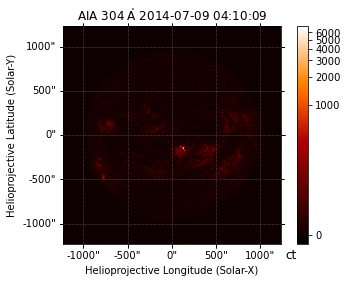

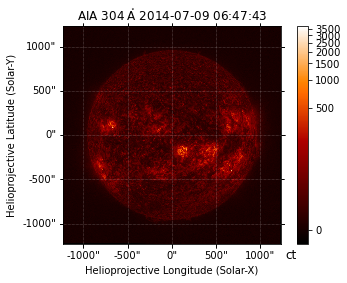

In [4]:
aia_map.peek()
aia_map2.peek()

In [5]:
x1, y1, x2, y2 = 1938, 2070, 1957, 1873  # 20131023_142944_3823251483
x1, y1, x2, y2 = 2306, 2460, 2309, 2263  # 20140709_041000_3820256490

gradient = (y2-y1)/(x2-x1)
origin = y1 - gradient * x1

y = np.arange(min(y1, y2),max(y1, y2)+1)
x = (y - origin) / gradient

coords = (np.column_stack((x.round().astype(int),y.astype(int))))
coords[0:5]

array([[2309, 2263],
       [2309, 2264],
       [2309, 2265],
       [2309, 2266],
       [2309, 2267]])

In [6]:
aia_data = aia_map.data
im = np.clip(aia_data, 0, aia_data.max())  # clip negative values, which are "outside" the disc / corona
im = im**0.4  # gamma correction
im = np.flipud(im)
aia_data.shape, aia_data.max(), im.max()

((4096, 4096), 6903.364913189901, 34.326089645978364)

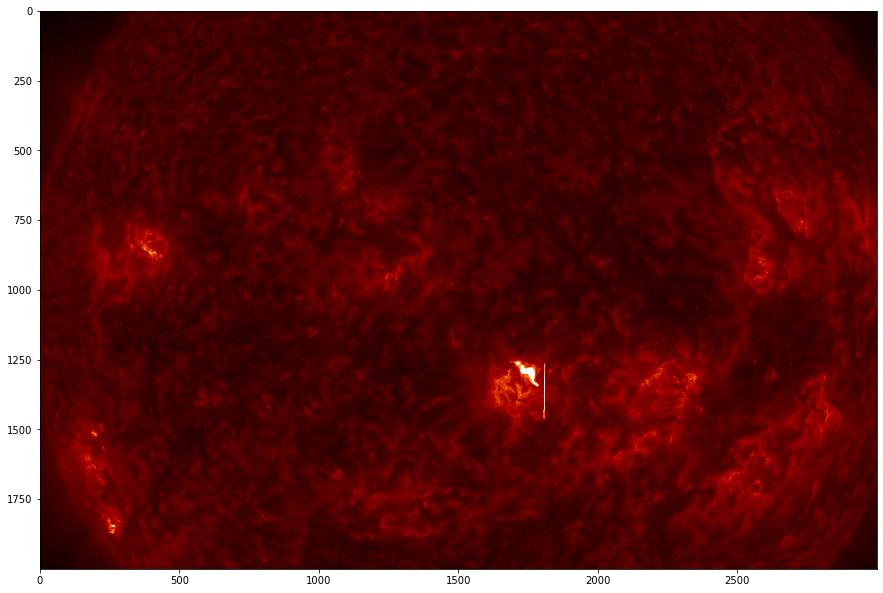

In [9]:
im[coords[:,1], coords[:,0]] = im.max()
plt.figure(figsize=(15,15))
plt.imshow(im[1000:3000,500:3500], cmap=aia_map.cmap, vmax=np.percentile(im, 99.99))

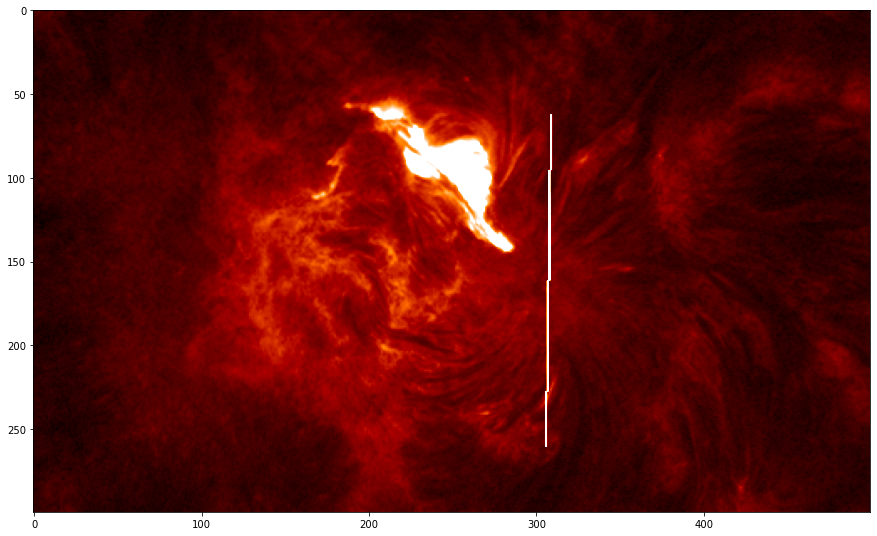

In [94]:
plt.figure(figsize=(15,15))
plt.imshow(im[2200:2500,2000:2500], cmap=aia_map.cmap, vmax=np.percentile(im, 99.99))

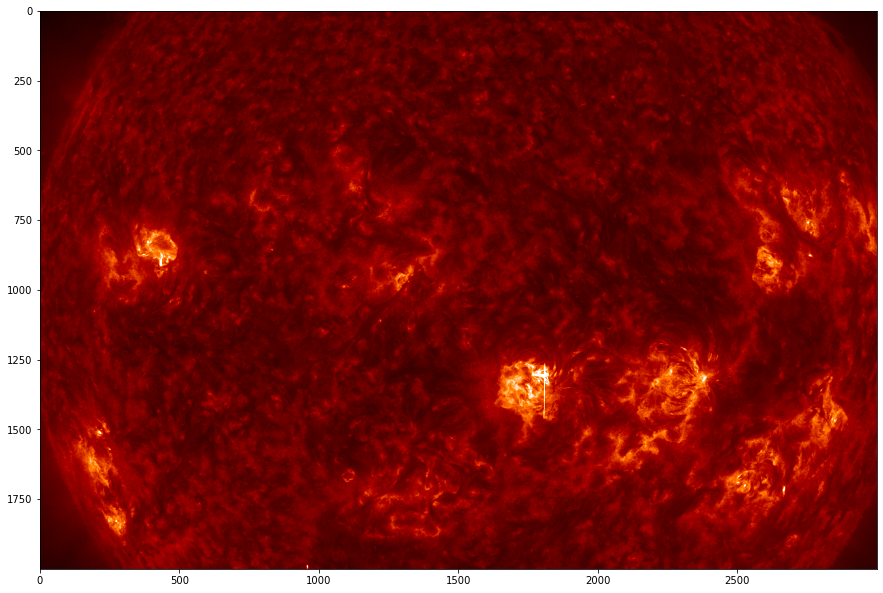

In [97]:
aia_data2 = aia_map2.data
im2 = np.clip(aia_data2, 0, aia_data2.max())  # clip negative values, which are "outside" the disc / corona
im2 = im2**0.4  # gamma correction
im2 = np.flipud(im2)

im2[coords[:,1], coords[:,0]] = im2.max()
plt.figure(figsize=(15,15))
plt.imshow(im2[1000:3000,500:3500], cmap=aia_map2.cmap, vmax=np.percentile(im2, 99.99))

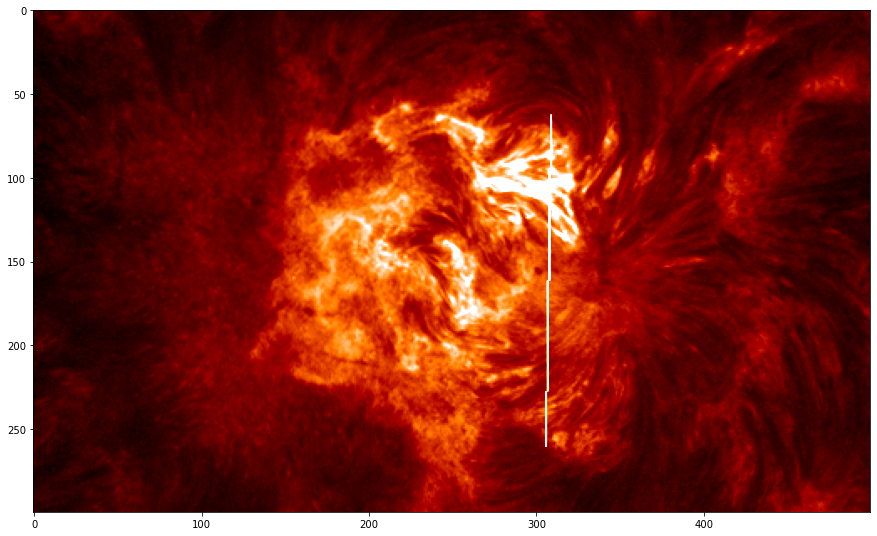

In [98]:
plt.figure(figsize=(15,15))
plt.imshow(im2[2200:2500,2000:2500], cmap=aia_map.cmap, vmax=np.percentile(im2, 99.99))

In [19]:
aia_map.meta['cdelt1'], aia_map.meta['cdelt2']

(0.6, 0.6)

In [145]:
import astropy.units as u
from sunpy.physics.differential_rotation import solar_rotate_coordinate

skycoords = aia_map.pixel_to_world(coords[:,0] * u.pix, coords[:,1] * u.pix)
skycoords2 = solar_rotate_coordinate(skycoords, time=(aia_map2.date - aia_map.date).to(u.s))
pxcoords = aia_map2.world_to_pixel(skycoords2)
coords2 = [pxcoords.y.value.round().astype('int'), pxcoords.x.value.round().astype('int')]  # y first (row-major)

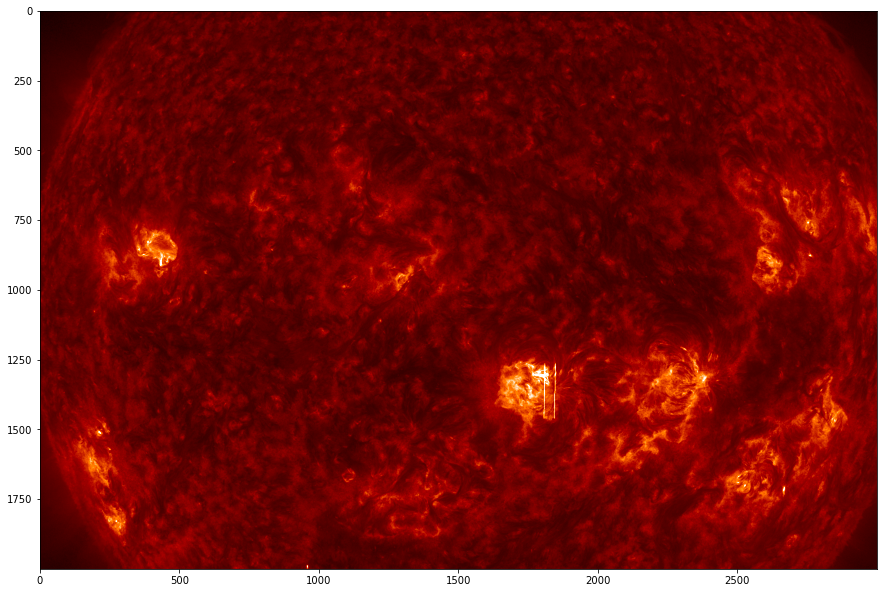

In [147]:
im2[tuple(coords2)] = im2.max()

plt.figure(figsize=(15,15))
plt.imshow(im2[1000:3000,500:3500], cmap=aia_map2.cmap, vmax=np.percentile(im2, 99.99))

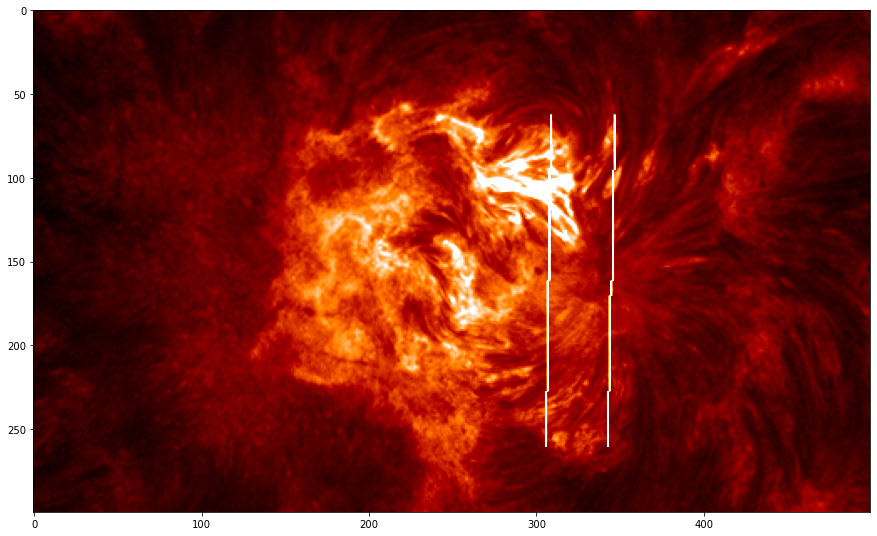

In [149]:
plt.figure(figsize=(15,15))
plt.imshow(im2[2200:2500,2000:2500], cmap=aia_map2.cmap, vmax=np.percentile(im2, 99.99))